In [6]:
import pandas as pd
import matplotlib.pyplot as plt

base_a = pd.read_excel('Saudi Pro League - Revenus et dépenses de transfert.xlsx')
base_b = pd.read_excel('Saudi Pro League - Classement et résultats _ 2023.xlsx')
base_c = pd.read_excel('Saudi Pro League - Classement _ Transfermarkt.xlsx')




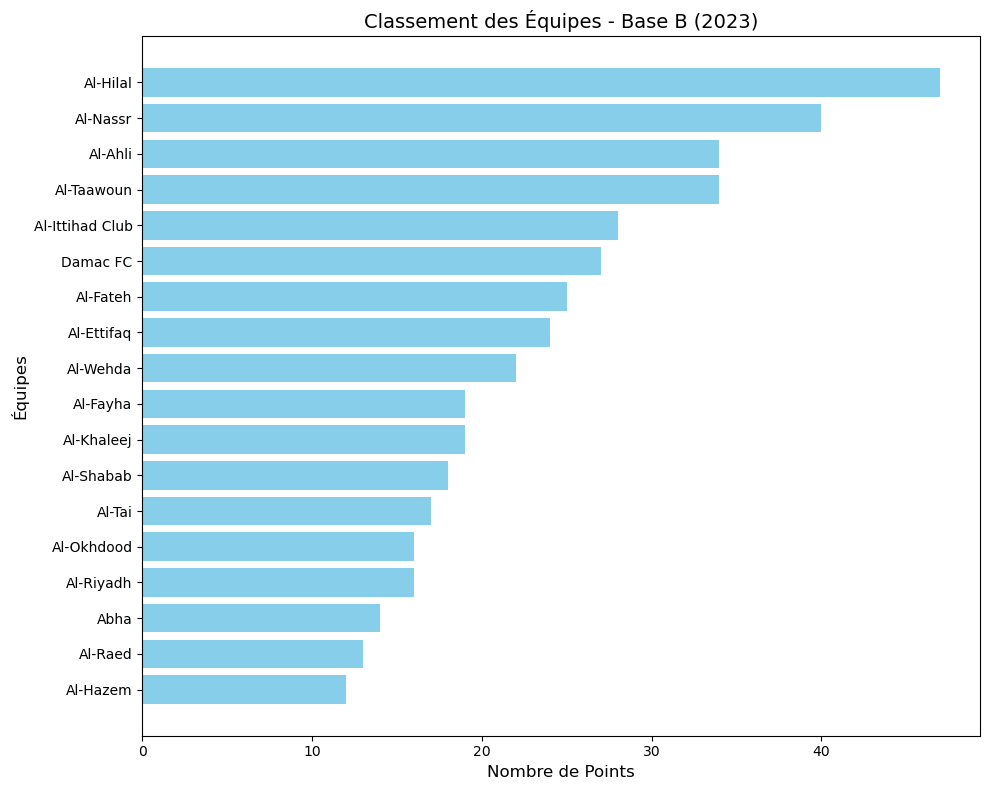

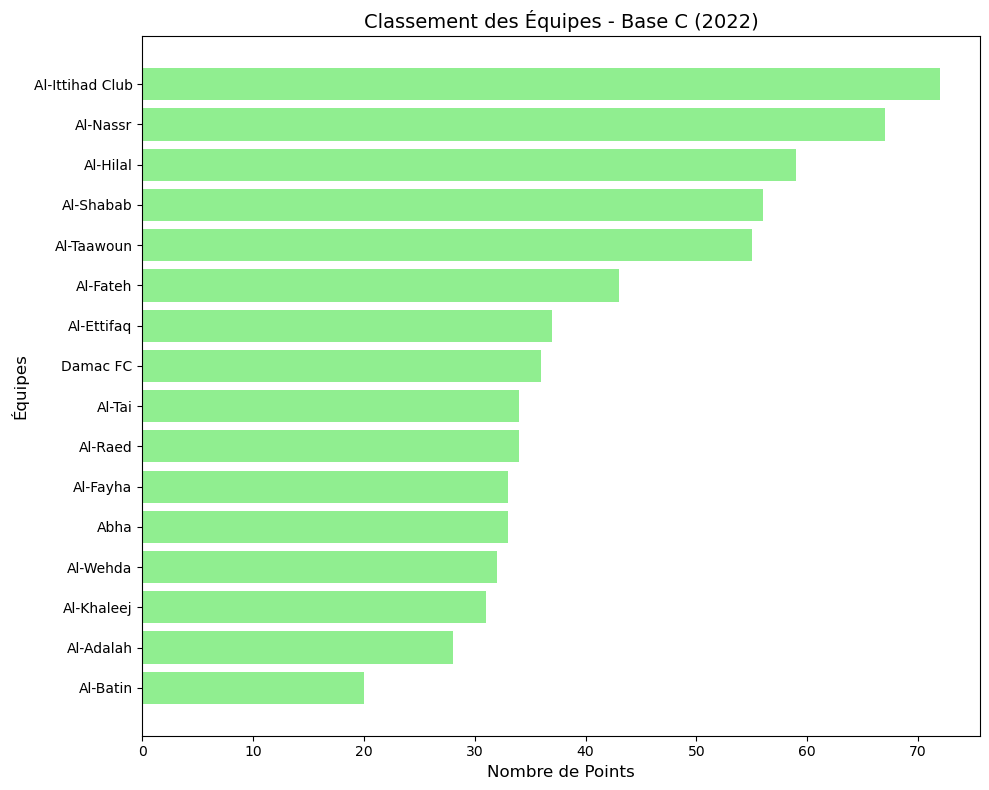

In [7]:
base_c_sorted = base_c.sort_values(by='point_2022', ascending=False)
base_b_sorted = base_b.sort_values(by='point_2023', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(base_b_sorted['equipe_2023'], base_b_sorted['point_2023'], color='skyblue')
plt.xlabel('Nombre de Points', fontsize=12)
plt.ylabel('Équipes', fontsize=12)
plt.title('Classement des Équipes - Base B (2023)', fontsize=14)
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le classement décroissant
plt.tight_layout()
plt.show()
base_c_sorted = base_c.sort_values(by='point_2022', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(base_c_sorted['equipe_2022'], base_c_sorted['point_2022'], color='lightgreen')
plt.xlabel('Nombre de Points', fontsize=12)
plt.ylabel('Équipes', fontsize=12)
plt.title('Classement des Équipes - Base C (2022)', fontsize=14)
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le classement décroissant
plt.tight_layout()
plt.show()


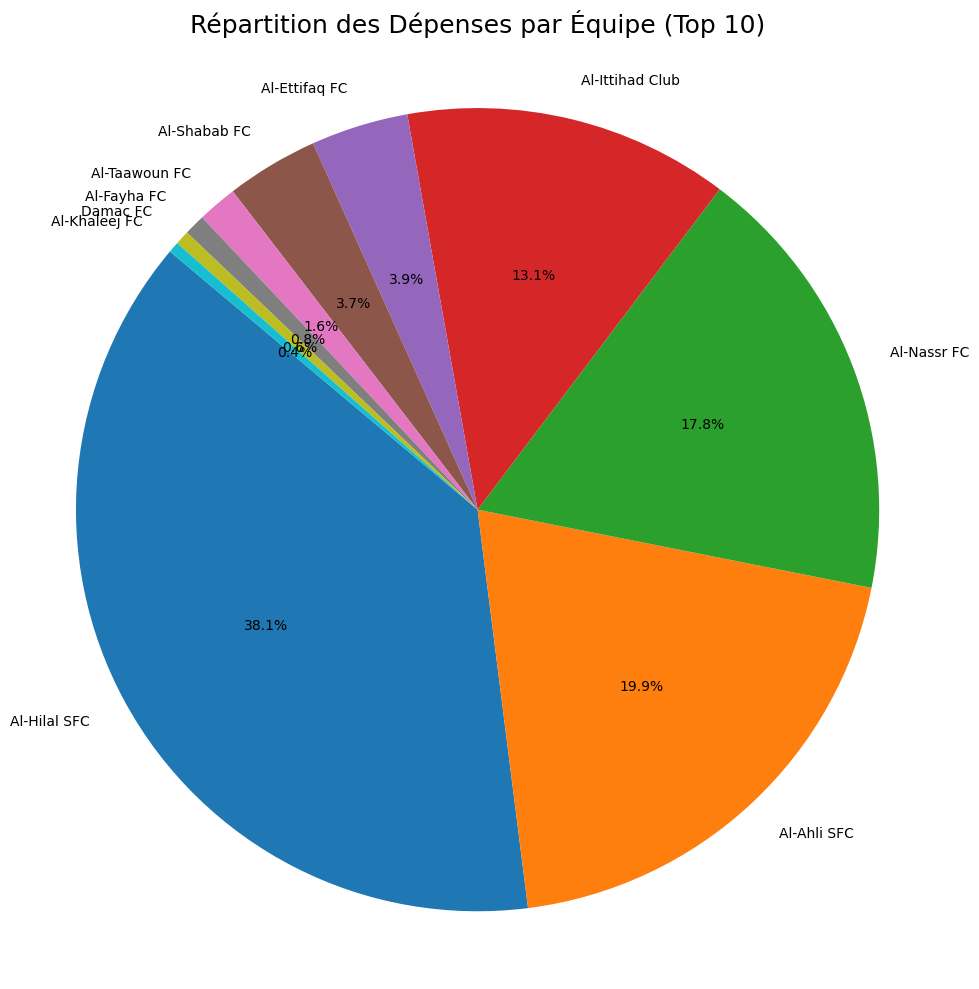

In [8]:
depenses_par_equipe = base_a.groupby('Club_s')['Dépenses'].sum()

depenses_par_equipe = depenses_par_equipe.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(depenses_par_equipe.head(10), labels=depenses_par_equipe.head(10).index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assurer que le pie chart est parfaitement circulaire
plt.title('Répartition des Dépenses par Équipe (Top 10)', fontsize=18)
plt.tight_layout()
plt.show()


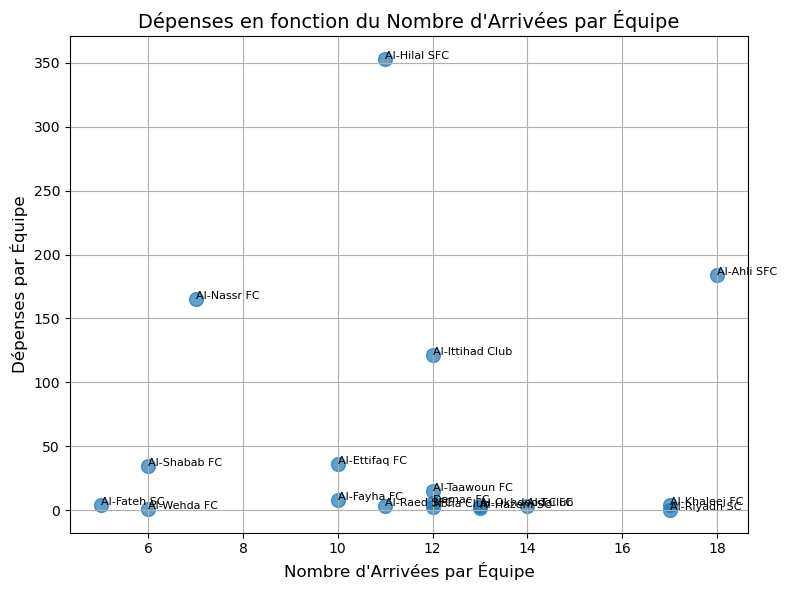

In [9]:
arrivees_par_equipe = base_a.groupby('Club_s')['Arrivées'].sum()

donnees_agregees = pd.DataFrame({'Dépenses': base_a.groupby('Club_s')['Dépenses'].sum(), 'Arrivées': arrivees_par_equipe})

plt.figure(figsize=(8, 6))
plt.scatter(donnees_agregees['Arrivées'], donnees_agregees['Dépenses'], s=100, alpha=0.7)
plt.xlabel('Nombre d\'Arrivées par Équipe', fontsize=12)
plt.ylabel('Dépenses par Équipe', fontsize=12)
plt.title('Dépenses en fonction du Nombre d\'Arrivées par Équipe', fontsize=14)

for i, txt in enumerate(donnees_agregees.index):
    plt.annotate(txt, (donnees_agregees['Arrivées'][i], donnees_agregees['Dépenses'][i]), fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

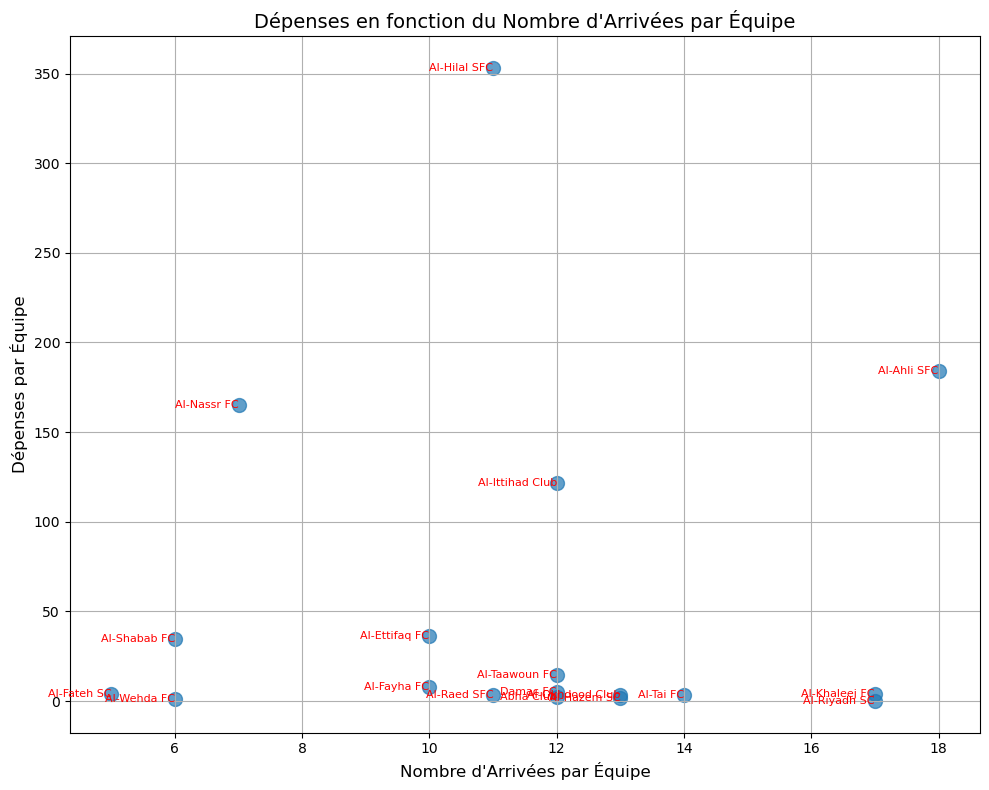

In [29]:

arrivees_par_equipe = base_a.groupby('Club_s')['Arrivées'].sum()

donnees_agregees = pd.DataFrame({'Dépenses': base_a.groupby('Club_s')['Dépenses'].sum(), 'Arrivées': arrivees_par_equipe})

plt.figure(figsize=(10, 8))
plt.scatter(donnees_agregees['Arrivées'], donnees_agregees['Dépenses'], s=100, alpha=0.7)
plt.xlabel('Nombre d\'Arrivées par Équipe', fontsize=12)
plt.ylabel('Dépenses par Équipe', fontsize=12)
plt.title('Dépenses en fonction du Nombre d\'Arrivées par Équipe', fontsize=14)

for equipe, row in donnees_agregees.iterrows():
    plt.text(row['Arrivées'], row['Dépenses'], equipe, fontsize=8, color='red', ha='right', va='center')

plt.grid(True)z
plt.tight_layout()
plt.show()


In [15]:
import numpy as np

depenses_par_equipe = base_a.groupby('Club_s')['Dépenses'].sum()

donnees_agregees = pd.DataFrame({'Dépenses': depenses_par_equipe, 'Arrivées': base_a.groupby('Club_s')['Arrivées'].sum()})

donnees_agregees = donnees_agregees.sort_values(by='Dépenses', ascending=False)

plt.figure(figsize=(10, 8))

palette_couleurs = plt.cm.get_cmap('tab20')(len(donnees_agregees))

for i, equipe in enumerate(donnees_agregees.index):
    plt.scatter(donnees_agregees['Arrivées'][i], donnees_agregees['Dépenses'][i], 
                s=100, alpha=0.7, label=equipe, c=np.array(palette_couleurs(i)).reshape(1, -1))

# Ajouter un histogramme des dépenses par équipe
plt.bar(donnees_agregees.index, donnees_agregees['Dépenses'], color=palette_couleurs(np.arange(len(donnees_agregees))))
plt.xlabel('Équipes', fontsize=12)
plt.ylabel('Dépenses par Équipe', fontsize=12)
plt.title('Dépenses en fonction du Nombre d\'Arrivées par Équipe', fontsize=14)
plt.legend(markerscale=1.5, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.gca().invert_xaxis()  # Inverser l'axe x pour une tendance décroissante des dépenses
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_16952\753405935.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette_couleurs = plt.cm.get_cmap('tab20')(len(donnees_agregees))


TypeError: 'tuple' object is not callable

<Figure size 1000x800 with 0 Axes>